# ML Assignment 3 – Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/mobile_price.csv")
df.head(5)

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


# Machine Learning Model Building Steps:-
## 1.	Explore the Dataset:


In [5]:
df1 = df.copy()

### 1.1.	Understand the Data:

In [5]:
df1.shape

(161, 14)

In [6]:
df1.dtypes

Product_id        int64
Price             int64
Sale              int64
weight          float64
resoloution     float64
ppi               int64
cpu core          int64
cpu freq        float64
internal mem    float64
ram             float64
RearCam         float64
Front_Cam       float64
battery           int64
thickness       float64
dtype: object

In [7]:
df1.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [8]:
df1.duplicated().sum()

0

### 1.2.	Examine Statistical Summary:

In [9]:
df1.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [10]:
df1.value_counts()

Product_id  Price  Sale  weight  resoloution  ppi  cpu core  cpu freq  internal mem  ram    RearCam  Front_Cam  battery  thickness
10          1950   26    118.0   5.0          187  4         1.30      8.0           1.000  8.00     2.0        2000     6.4          1
774         1238   20    134.1   4.0          233  2         1.20      8.0           1.000  2.00     0.0        1560     11.7         1
880         1749   10    125.0   4.0          233  2         1.30      4.0           1.000  3.15     0.0        1700     9.9          1
                   11    125.0   4.0          233  2         1.30      4.0           1.000  3.15     0.0        1700     9.9          1
907         2087   37    147.0   5.0          294  4         1.30      32.0          3.000  8.00     5.0        2450     7.6          1
                                                                                                                                     ..
497         2266   599   112.0   5.0          294  8 

### 1.3.	Correlation Analysis: 

In [6]:
corr_matrix = df1.corr()
corr_matrix

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
Product_id,1.000000,0.165136,0.218548,0.035869,-0.017817,0.207271,-0.008634,0.092428,0.261186,0.236194,0.172812,0.071020,0.031745,0.039807
Price,0.165136,1.000000,0.273263,0.144555,0.404010,0.817614,0.686811,0.727383,0.776738,0.896915,0.739538,0.675286,0.559946,-0.716773
Sale,0.218548,0.273263,1.000000,0.016114,0.017154,0.235896,0.069517,0.099133,0.489308,0.373127,0.292164,0.437233,0.120338,-0.047991
weight,0.035869,0.144555,0.016114,1.000000,0.890416,-0.054683,0.216257,0.222730,0.098849,0.149283,-0.029448,-0.005971,0.833783,-0.185262
resoloution,-0.017817,0.404010,0.017154,0.890416,1.000000,0.181292,0.472226,0.505454,0.202660,0.327216,0.249892,0.202720,0.843462,-0.533708
ppi,0.207271,0.817614,0.235896,-0.054683,0.181292,1.000000,0.487990,0.713168,0.618560,0.748724,0.774008,0.491371,0.302517,-0.496791
cpu core,-0.008634,0.686811,0.069517,0.216257,0.472226,0.487990,1.000000,0.491519,0.276251,0.483128,0.611353,0.586698,0.459728,-0.697935
cpu freq,0.092428,0.727383,0.099133,0.222730,0.505454,0.713168,0.491519,1.000000,0.441400,0.633547,0.625104,0.358319,0.473137,-0.614458
internal mem,0.261186,0.776738,0.489308,0.098849,0.202660,0.618560,0.276251,0.441400,1.000000,0.875354,0.451917,0.555733,0.461506,-0.367412
ram,0.236194,0.896915,0.373127,0.149283,0.327216,0.748724,0.483128,0.633547,0.875354,1.000000,0.648073,0.647470,0.541001,-0.521074


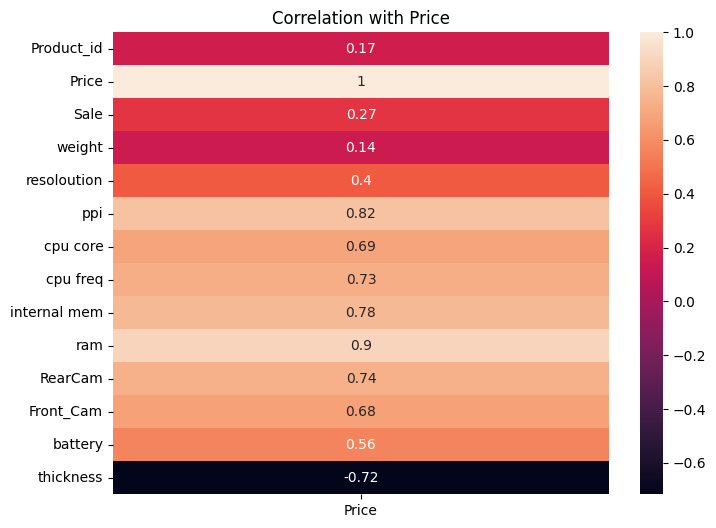

In [8]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix[['Price']],annot=True)
plt.title('Correlation with Price')
plt.show()

### 1.4.	Relationship Analysis: 

In [13]:
top_4_features = corr_matrix['Price'].abs().sort_values(ascending=False).index[1:5]

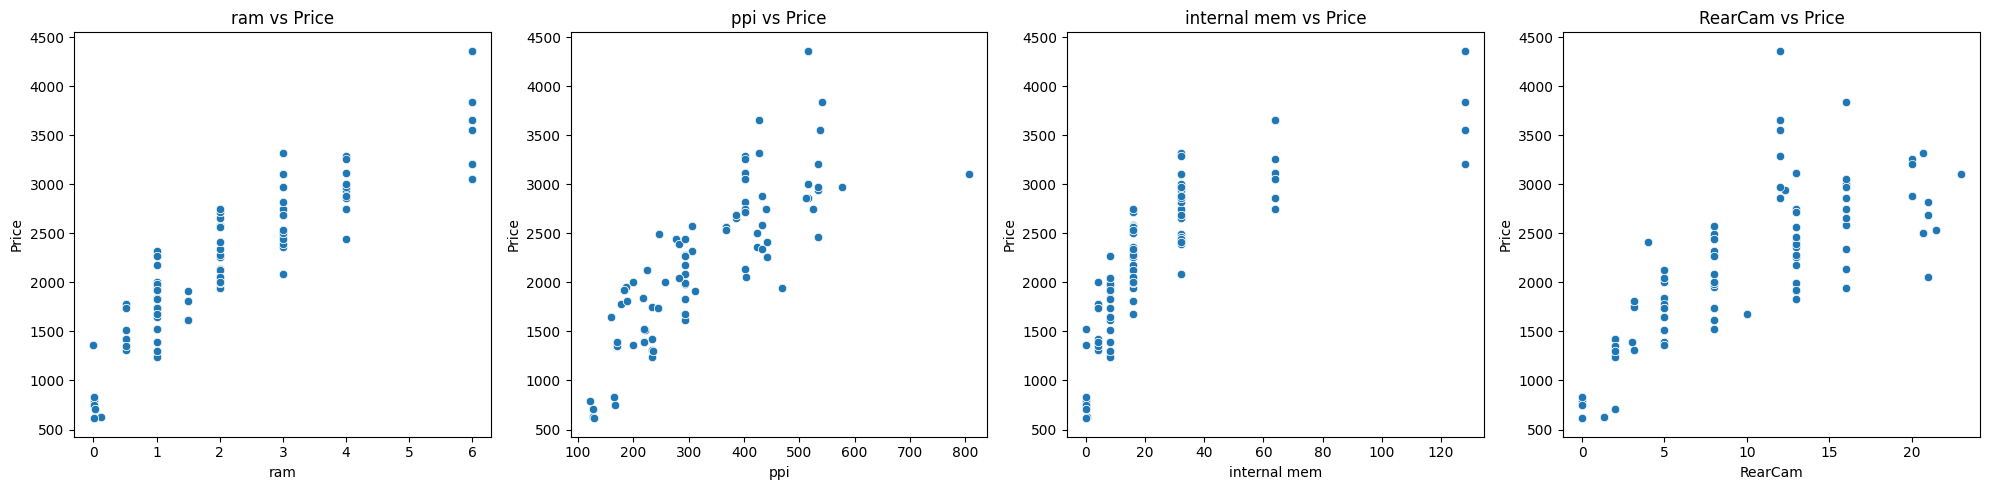

In [14]:
fig, axes = plt.subplots(ncols=4, figsize=(20, 5))
for i, feature in enumerate(top_4_features):
    sns.scatterplot(x=df[feature], y=df['Price'], ax=axes[i])
    axes[i].set_title(f'{feature} vs Price')
plt.tight_layout()
plt.show()

## 2.	Prepare the Data:
### 2.1.	Feature Selection: 


In [15]:
target_corr= corr_matrix['Price']
target_corr

Product_id      0.165136
Price           1.000000
Sale            0.273263
weight          0.144555
resoloution     0.404010
ppi             0.817614
cpu core        0.686811
cpu freq        0.727383
internal mem    0.776738
ram             0.896915
RearCam         0.739538
Front_Cam       0.675286
battery         0.559946
thickness      -0.716773
Name: Price, dtype: float64

In [16]:
target_corr= corr_matrix['Price'].abs().sort_values(ascending=False)
target_corr

Price           1.000000
ram             0.896915
ppi             0.817614
internal mem    0.776738
RearCam         0.739538
cpu freq        0.727383
thickness       0.716773
cpu core        0.686811
Front_Cam       0.675286
battery         0.559946
resoloution     0.404010
Sale            0.273263
Product_id      0.165136
weight          0.144555
Name: Price, dtype: float64

In [17]:
inter_feature_corr=corr_matrix.drop('Price',axis=1).drop('Price',axis=0).abs()
inter_feature_corr

,Product_id,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
Product_id,1.000000,0.218548,0.035869,0.017817,0.207271,0.008634,0.092428,0.261186,0.236194,0.172812,0.071020,0.031745,0.039807
Sale,0.218548,1.000000,0.016114,0.017154,0.235896,0.069517,0.099133,0.489308,0.373127,0.292164,0.437233,0.120338,0.047991
weight,0.035869,0.016114,1.000000,0.890416,0.054683,0.216257,0.222730,0.098849,0.149283,0.029448,0.005971,0.833783,0.185262
resoloution,0.017817,0.017154,0.890416,1.000000,0.181292,0.472226,0.505454,0.202660,0.327216,0.249892,0.202720,0.843462,0.533708
ppi,0.207271,0.235896,0.054683,0.181292,1.000000,0.487990,0.713168,0.618560,0.748724,0.774008,0.491371,0.302517,0.496791
cpu core,0.008634,0.069517,0.216257,0.472226,0.487990,1.000000,0.491519,0.276251,0.483128,0.611353,0.586698,0.459728,0.697935
cpu freq,0.092428,0.099133,0.222730,0.505454,0.713168,0.491519,1.000000,0.441400,0.633547,0.625104,0.358319,0.473137,0.614458
internal mem,0.261186,0.489308,0.098849,0.202660,0.618560,0.276251,0.441400,1.000000,0.875354,0.451917,0.555733,0.461506,0.367412
ram,0.236194,0.373127,0.149283,0.327216,0.748724,0.483128,0.633547,0.875354,1.000000,0.648073,0.647470,0.541001,0.521074
RearCam,0.172812,0.292164,0.029448,0.249892,0.774008,0.611353,0.625104,0.451917,0.648073,1.000000,0.596374,0.287821,0.550998


In [18]:
selected_features = []
print ("Feature Selection Process :")
for features in target_corr.index:
    if features == 'Price':
        continue
    if all(inter_feature_corr[features].loc[selected_features] < 0.75):
        selected_features.append(features)
        print(f"selected : {features} correlation with price : {target_corr[features]}")
    else:
        print(f"Rejected : {features} due to high inter-correlation")
print("\nFinal Selected Features")        
print(selected_features)

Feature Selection Process :
selected : ram correlation with price : 0.8969150716315669
selected : ppi correlation with price : 0.8176144510260609
Rejected : internal mem due to high inter-correlation
Rejected : RearCam due to high inter-correlation
selected : cpu freq correlation with price : 0.7273828277036033
selected : thickness correlation with price : 0.7167730617409211
selected : cpu core correlation with price : 0.6868106446685591
selected : Front_Cam correlation with price : 0.6752864099427016
selected : battery correlation with price : 0.5599456899956516
Rejected : resoloution due to high inter-correlation
selected : Sale correlation with price : 0.2732625202250552
selected : Product_id correlation with price : 0.16513581155352028
Rejected : weight due to high inter-correlation

Final Selected Features
['ram', 'ppi', 'cpu freq', 'thickness', 'cpu core', 'Front_Cam', 'battery', 'Sale', 'Product_id']


## 2.2.	Split the Dataset: 

In [11]:
X=df1.drop('Price',axis=1)
X.head()

,Product_id,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [12]:
y=df1['Price']
y.head()

0    2357
1    1749
2    1916
3    1315
4    1749
Name: Price, dtype: int64

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
print(f" X_train.shape : {X_train.shape} ")
print(f" X_test.shape : {X_test.shape} ")
print(f" y_train.shape : {y_train.shape} ")
print(f" y_test.shape : {y_test.shape} ")

 X_train.shape : (128, 13) 
 X_test.shape : (33, 13) 
 y_train.shape : (128,) 
 y_test.shape : (33,) 


In [23]:
print(df1.shape)
print(128+33)

(161, 14)
161


## 3.	Build and Train the Model:
### 3.1.	Create a Linear Regression Model: 

In [24]:
model=LinearRegression()

### 3.2.	Train the Model: 

In [25]:
model.fit(X_train,y_train)

LinearRegression()

In [26]:
coefficients = model.coef_
coefficients

array([ 5.38073284e-02, -1.82887485e-02, -8.81592187e-01, -5.09440811e+01,
        1.10822029e+00,  4.93124037e+01,  1.26691872e+02,  5.26514379e+00,
        1.00906852e+02,  2.55238331e+00,  7.68694997e+00,  1.36214111e-01,
       -7.01639389e+01])

In [27]:
intercept = model.intercept_
intercept

1629.0911226213848

In [28]:
X_test.head(1)

,Product_id,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
105,827,213,78.4,2.4,166,0,0.0,0.0,0.008,0.0,0.0,1100,12.9


In [29]:
m = [5.38073284e-02, -1.82887485e-02, -8.81592187e-01, -5.09440811e+01,
     1.10822029e+00, 4.93124037e+01, 1.26691872e+02, 5.26514379e+00,
     1.00906852e+02, 2.55238331e+00, 7.68694997e+00, 1.36214111e-01,
     -7.01639389e+01]
x = [827, 213, 78.4, 2.4, 166, 0, 0.0, 0.0, 0.008, 0.0, 0.0, 1100, 12.9]
c = 1629.0911226213848
ypred = sum(m[i] * x[i] for i in range(len(m))) + c
print(f"Predicted value of y: {ypred}")

Predicted value of y: 907.8041909228847


## 4.	Evaluate the Model:
### 4.1.	Predict: 

In [30]:
newdf=X_test.head(1)
newdf

,Product_id,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
105,827,213,78.4,2.4,166,0,0.0,0.0,0.008,0.0,0.0,1100,12.9


In [31]:
model.predict(newdf)

array([907.80419127])

In [32]:
y_pred=model.predict(X_test)
y_pred

array([ 907.80419127, 1877.9636331 , 2615.30858191, 1531.29042803,
       1628.46951911, 1841.79162954,  908.02365625, 1319.97917421,
       2376.41443955, 2614.32098949, 1396.95346226, 1578.36876314,
       1784.47837742, 2873.44966804, 2196.11020964, 2175.34837587,
       2505.88579707, 3030.24748854, 1438.29688599, 2175.5129746 ,
       2305.10630183, 1784.44179992, 1925.7379722 , 2448.59069863,
       3108.92426374, 4103.16436544, 2476.31963034, 3428.65699478,
       2662.00019022, 2487.87426595, 3091.30292846, 2598.27957866,
       2568.4877093 ])

### 4.2.	Metrics Calculation: 
#### ➢	Slope (Coefficient) and Intercept: 

In [33]:
print("Coefficients (Slope):")
print("-"*25)
for feature, coef in zip(X.columns, coefficients):
    print(f"{feature}: {coef}")

print(f"\nIntercept (c): {intercept}")

Coefficients (Slope):
-------------------------
Product_id: 0.05380732844154265
Sale: -0.018288748549416
weight: -0.881592186874607
resoloution: -50.94408112937518
ppi: 1.1082202944825594
cpu core: 49.312403710565505
cpu freq: 126.6918721028675
internal mem: 5.265143789179712
ram: 100.90685224133705
RearCam: 2.5523833113733567
Front_Cam: 7.686949967362883
battery: 0.13621411052233895
thickness: -70.16393888720827

Intercept (c): 1629.0911226213848


### ➢	Model Performance Metrics: Calculate and report the following metrics:
#### ★	R² Score

In [34]:
r2_score(y_test,y_pred)

0.9593179111625726

#### ★	Mean Absolute Error (MAE): 

In [35]:
mean_absolute_error(y_test,y_pred)

130.31530961030836

#### ★	Mean Squared Error (MSE): 

In [36]:
mean_squared_error(y_test,y_pred)

23062.22989175094

## 5.	Conclude the Analysis:
### 5.1.	Model Evaluation: 

### Model Evaluation Summary

- #####  R² Score = 0.9593 → Excellent fit (96% variance explained).
- ##### MAE = 130.32 → Small average error.
- ##### MSE = 23062.23 → High, indicating some large errors.

### 5.2.	Insights and Discussion: 

#### ★	What insights did you gain from the correlation analysis and scatter plots?
-----------------------------------------------------------------
#### **Insights from Correlation Analysis and Scatter Plots**:
1. **Top Correlated Features**:
   - RAM (0.9): Strongest positive correlation with price.
   - Internal Memory (0.78) and PPI (0.82): High positive correlation.
   - CPU Core (0.69), CPU Frequency (0.73), RearCam (0.74), Front_Cam (0.68): Strongly influence price.
   - Thickness (-0.72)**: Thinner devices are more expensive.

2. **Scatter Plot (RAM vs. Price)**:
   - Clear positive trend: Higher RAM → Higher price.
   - Some outliers suggest other factors also impact price.

- RAM, Internal Memory, PPI are critical for pricing.
- Thickness negatively impacts price (thinner = more expensive).

#### ★	How do the selected features contribute to the prediction of mobile prices?
---------------------
- The provided selected feature selection process based on the correlation values between features. The goal is to select features that contribute meaningfully to predicting mobile prices while avoiding features with high multicollinearity.This selection process helps improve model accuracy and efficiency.

#### ★	What do the slope (coefficient) and intercept reveal about the relationship between the features and the target variable?
------------------
- **Positive coefficients** mean the feature increases the price (e.g., RAM and RearCam).
- **Negative coefficients** mean the feature decreases the price (e.g., weight and thickness).
- Larger coefficients indicate a stronger influence.

The **intercept** is **1629.09**, representing the starting price before any features are considered.

#### ★	How well does the model perform based on the evaluation metrics? Are there any discrepancies between the predicted and actual values?
---------------------------------------------------------------
- The R² of 0.96, meaning it explains 96% of the variance in mobile prices.
- The MAE of 130.32 suggests the average prediction error is about $130, which is reasonable for large price ranges.
- The MSE of 23062.23 indicates there are still some discrepancies, especially with larger price values. Overall, the model is accurate but can be improved slightly to reduce prediction errors.

#### ★	What might be some potential improvements or additional steps you could take to enhance the model’s performance?
----------------------------
- By enhancing features, improving model tuning, addressing outliers, and experimenting with different algorithms, the model’s performance can be further optimized for better accuracy and generalization

> #### I used Model Tuning::

In [23]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

base_learner= DecisionTreeClassifier(max_depth=4)

ada_model = AdaBoostClassifier(estimator=base_learner,n_estimators=200, algorithm = 'SAMME')
ada_model.fit(X_train,y_train)

accuracy_ada = ada_model.score(X_test, y_test)
print(f"AdaBoost accuracy: {accuracy_ada:.4f}")

AdaBoost accuracy: 0.6667


In [25]:
# Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier

gb_model=GradientBoostingClassifier(n_estimators=200)
gb_model.fit(X_train,y_train)

accuracy_gb = gb_model.score(X_test, y_test)
print(f"GB accuracy: {accuracy_gb:.4f}")

GB accuracy: 0.6970
